<a href="https://colab.research.google.com/github/KhmAsif/IMSE441S2025/blob/main/Confidence_Interval_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import math

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441S2025/refs/heads/main/Grip_strength.csv')

In [ ]:
data.head(10)

,No,Gender,Grip_Strength,Height,Shoe_size
0,1,M,64.4,6.0,13.5
1,2,M,48.6,5.1,11.0
2,3,M,42.5,5.8,8.0
3,4,M,50.2,5.1,9.5
4,5,M,40.6,6.1,11.0
5,6,M,68.7,6.0,12.5
6,7,M,60.6,5.7,10.5
7,8,F,37.7,5.8,11.0
8,9,F,39.8,5.0,6.0
9,10,M,67.8,5.7,9.0


In [ ]:
data.describe()

,No,Grip_Strength,Height,Shoe_size
count,29.000000,29.000000,29.000000,29.000000
mean,15.000000,51.610345,5.641724,10.155172
std,8.514693,12.672787,0.443187,1.936969
min,1.000000,31.100000,5.000000,6.000000
25%,8.000000,41.100000,5.110000,9.000000
50%,15.000000,50.200000,5.700000,10.500000
75%,22.000000,62.400000,6.000000,11.000000
max,29.000000,75.800000,6.400000,13.500000


# Very Important step for Confidence interval testing is to check for normality. The equation for confidence interval is trrue only for normally distributed data.

In [ ]:
!pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.9 MB/s eta 0:00:00


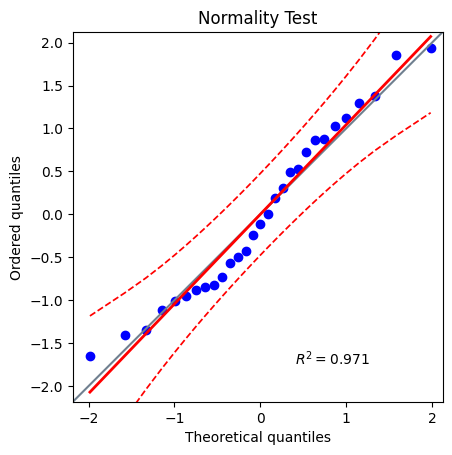

In [ ]:
pg.qqplot(data['Grip_Strength']).set_title('Normality Test')
plt.show()

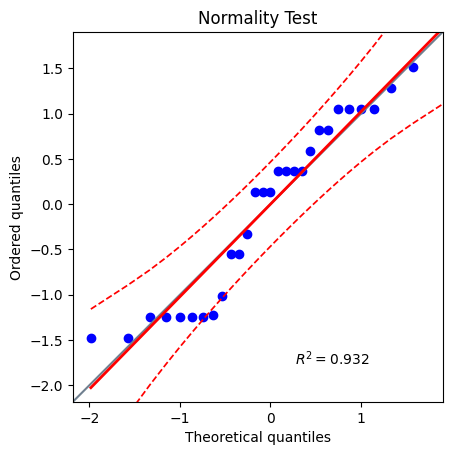

In [ ]:
pg.qqplot(data['Height']).set_title('Normality Test')
plt.show()

# How does a 'Not Normal Data' look?

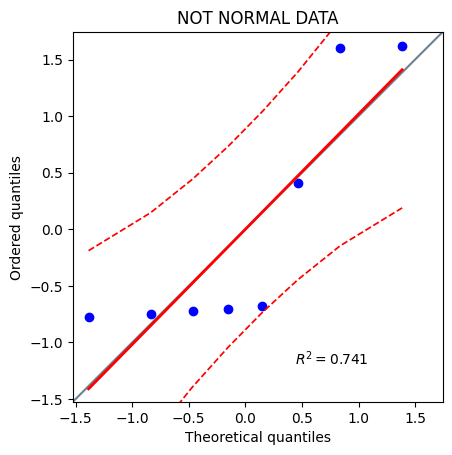

In [ ]:
df = [1, 2, 3, 4,5,50, 99, 100]
pg.qqplot(df).set_title('NOT NORMAL DATA')
plt.show()

# Using Normal distribution (When your are sure or large sample)

In [ ]:
norm.interval(0.95, loc=data['Grip_Strength'].mean(),scale=stats.sem(data['Grip_Strength']))

(46.9980057214252, 56.22268393374722)

# Using t distribution (When sample size is small)

In [ ]:
n=len(data['Grip_Strength'])

In [ ]:
n

29

In [ ]:
stats.t.interval(0.95,  df= n-1, loc=data['Grip_Strength'].mean(), scale=stats.sem(data['Grip_Strength']))

(46.78987443120856, 56.43081522396386)

# Using t test

In [ ]:
CI= stats.ttest_1samp(data['Grip_Strength'], popmean=51.61).confidence_interval(confidence_level=0.95)
CI


ConfidenceInterval(low=46.78987443120857, high=56.430815223963855)

# How to calculate one sided interval?

In [ ]:
#upper confidence interval 95% normal distribution

z_value=norm.ppf(.95)
n=len(data['Grip_Strength'])
sample_std=data['Grip_Strength'].std()
sample_mean= data['Grip_Strength'].mean()
margin_error= z_value*sample_std/math.sqrt(n)

upper_1_sided= sample_mean + margin_error
print('one sided upper confidence interval is', upper_1_sided)

one sided upper confidence interval is 55.48114182556238


In [ ]:
#lower confidence interval 95% t distribution

n=len(data['Grip_Strength'])
t_value=stats.t.ppf(.95, df=n-1)
sample_std=data['Grip_Strength'].std()
sample_mean= data['Grip_Strength'].mean()
margin_error= t_value*sample_std/math.sqrt(n)

lower_1_sided= sample_mean - margin_error
print('one sided lower confidence interval is', lower_1_sided)

one sided lower confidence interval is 47.607111709679586
